In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
os.chdir('C:/Users/jeosp/Desktop/Principal/Maestría/Proyecto integrador')
data = pd.read_csv('merged_data.csv')

In [4]:
for col in data.columns:
    print(f'Tipo de valor {col}', data[col].dtypes, sep = '\n')

Tipo de valor symbol
object
Tipo de valor timestamp
object
Tipo de valor open
float64
Tipo de valor high
float64
Tipo de valor low
float64
Tipo de valor close
float64
Tipo de valor close_adj
float64
Tipo de valor volume
float64
Tipo de valor trade_count
float64
Tipo de valor size_index
object
Tipo de valor sector_index
object
Tipo de valor range_rel_last1d
float64
Tipo de valor rvol_20d
float64
Tipo de valor upper_wick_ratio_last1d
float64
Tipo de valor lower_wick_ratio_last1d
float64
Tipo de valor weekday
object
Tipo de valor weekday_sin
float64
Tipo de valor weekday_cos
float64
Tipo de valor days_since_holiday
float64
Tipo de valor pm_rts_hist
float64
Tipo de valor hhi_premarket_volume
float64
Tipo de valor va_struggle
float64
Tipo de valor va_absolute_path
float64
Tipo de valor std_return_last5d
float64
Tipo de valor market_absolute_path
float64
Tipo de valor prev_day_return
float64
Tipo de valor gap_pct
float64
Tipo de valor dist_max_20d
float64
Tipo de valor pm_vwap_return
float64

In [5]:
for col in data.columns:
    print(f'Valores unicos col: {col}', data[col].nunique(), sep = '\n')

Valores unicos col: symbol
95
Valores unicos col: timestamp
2465
Valores unicos col: open
36135
Valores unicos col: high
55612
Valores unicos col: low
55369
Valores unicos col: close
41293
Valores unicos col: close_adj
37626
Valores unicos col: volume
221169
Valores unicos col: trade_count
71326
Valores unicos col: size_index
3
Valores unicos col: sector_index
19
Valores unicos col: range_rel_last1d
206617
Valores unicos col: rvol_20d
225876
Valores unicos col: upper_wick_ratio_last1d
124189
Valores unicos col: lower_wick_ratio_last1d
126270
Valores unicos col: weekday
5
Valores unicos col: weekday_sin
5
Valores unicos col: weekday_cos
5
Valores unicos col: days_since_holiday
93
Valores unicos col: pm_rts_hist
102879
Valores unicos col: hhi_premarket_volume
67920
Valores unicos col: va_struggle
84625
Valores unicos col: va_absolute_path
82275
Valores unicos col: std_return_last5d
227681
Valores unicos col: market_absolute_path
227540
Valores unicos col: prev_day_return
197183
Valores u

### Desviaciones de los retornos

In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'], yearfirst = True, utc = True)
data['timestamp'] = data['timestamp'].dt.date

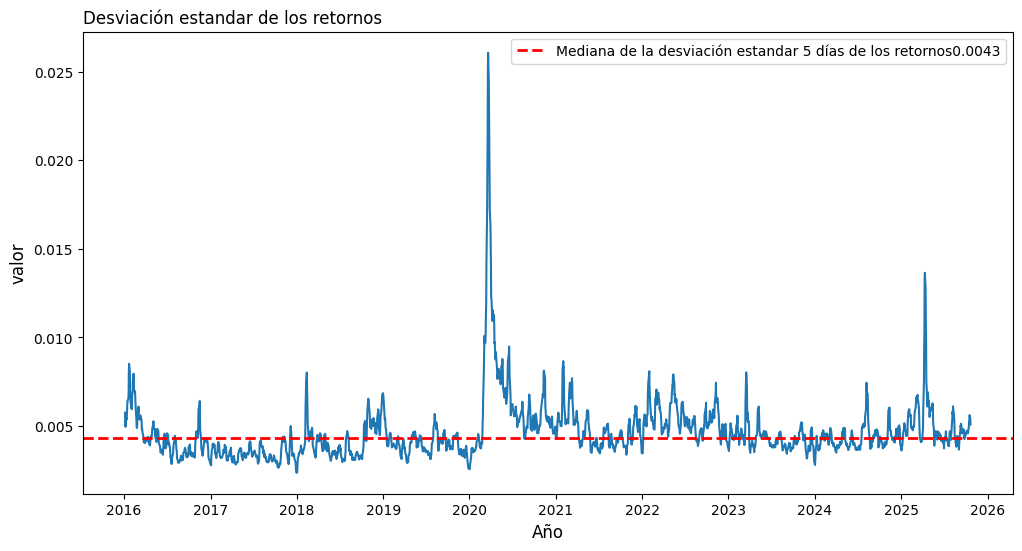

In [7]:
plt.figure(figsize=(12, 6))
groupby_date = data.groupby('timestamp')['std_return_last5d'].mean().reset_index()
mediana = groupby_date['std_return_last5d'].median()
sns.lineplot(data = groupby_date, x = 'timestamp', y = 'std_return_last5d')
plt.axhline(y = mediana, color = 'red', linestyle = '--', linewidth = 2, 
            label = f'Mediana de la desviación estandar 5 días de los retornos{mediana:.4f}')
plt.xlabel('Año', size = 12)
plt.ylabel('valor', size = 12)
plt.title('Desviación estandar de los retornos', loc = 'left')
plt.legend()


In [8]:
groupby_date['std_return_last5d'].describe()
print(groupby_date['std_return_last5d'].max() / groupby_date['std_return_last5d'].median())

# El maximo de la desviación estandar equivale a 6 veces el valor de la media 

print(f'Valor maximo std = {groupby_date['std_return_last5d'].max()}')
print(f'Valor mediana std = {groupby_date['std_return_last5d'].median()}')

6.024612406683738
Valor maximo std = 0.026077298039880847
Valor mediana std = 0.004328460700799698


C:\Users\jeosp\AppData\Local\Temp\ipykernel_2704\1723820200.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


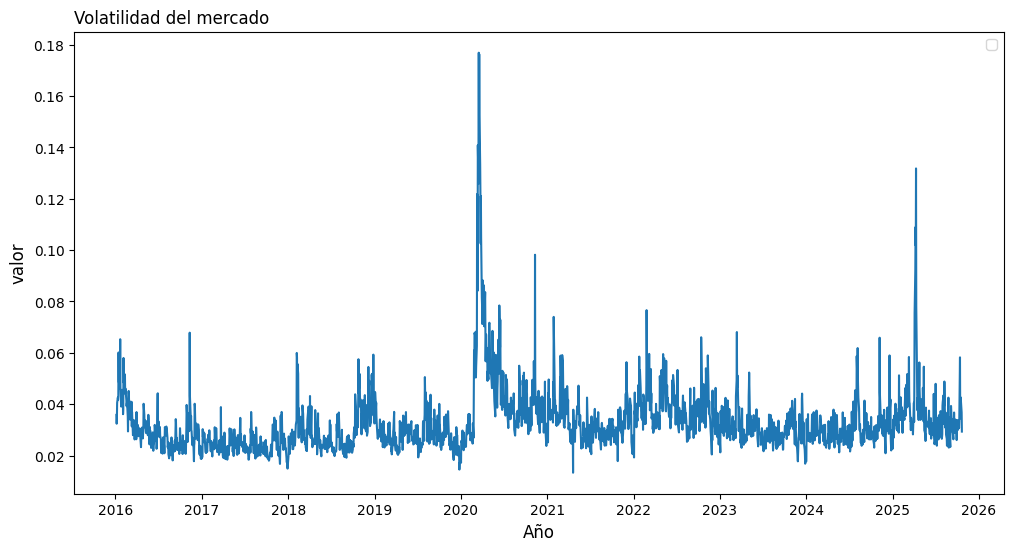

In [9]:
plt.figure(figsize=(12, 6))
groupby_date = data.groupby('timestamp')['range_rel_last1d'].mean().reset_index()
mediana = groupby_date['range_rel_last1d'].median()
sns.lineplot(data = groupby_date, x = 'timestamp', y = 'range_rel_last1d')
plt.xlabel('Año', size = 12)
plt.ylabel('valor', size = 12)
plt.title('Volatilidad del mercado', loc = 'left')
plt.legend()

# las volatilidades parecen estar directamente relacionadas con el rezago de los retornos

Porcentaje de correlación entre las variables std_return_last5d y range_rel_last1d:                    std_return_last5d  range_rel_last1d
std_return_last5d           1.000000          0.690876
range_rel_last1d            0.690876          1.000000


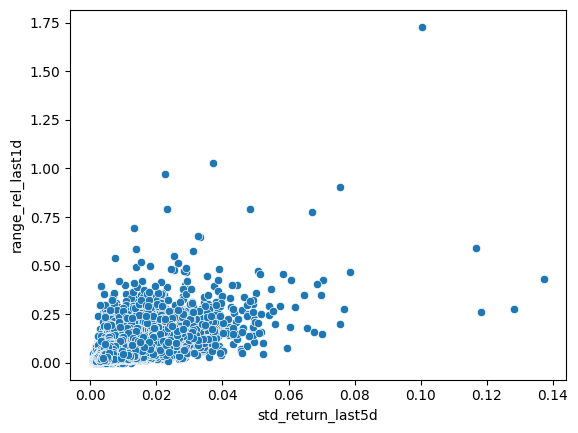

In [10]:
corr = data.loc[:, ['std_return_last5d', 'range_rel_last1d']].corr()
print(f'Porcentaje de correlación entre las variables std_return_last5d y range_rel_last1d: {corr}')
sns.scatterplot(x = data['std_return_last5d'], y = data['range_rel_last1d'])
plt.show()

## En efecto estan correlacionadas 

In [11]:
# Variables con correlacioón mayor al 70%
corr = data.corr(numeric_only = True)
corr_unstacked = corr.unstack()
corr_limpio = corr_unstacked[
    (np.triu(np.ones(corr.shape), k=1) == 1).flatten()
]

corr_final = corr_limpio[abs(corr_limpio) > 0.70]
corr_final = corr_final.sort_values(ascending=False)
corr_final

low     close          0.999828
open    high           0.999820
high    close          0.999818
open    low            0.999791
high    low            0.999710
open    close          0.999638
volume  trade_count    0.841577
close   close_adj      0.840117
high    close_adj      0.840006
open    close_adj      0.839942
low     close_adj      0.839841
dtype: float64

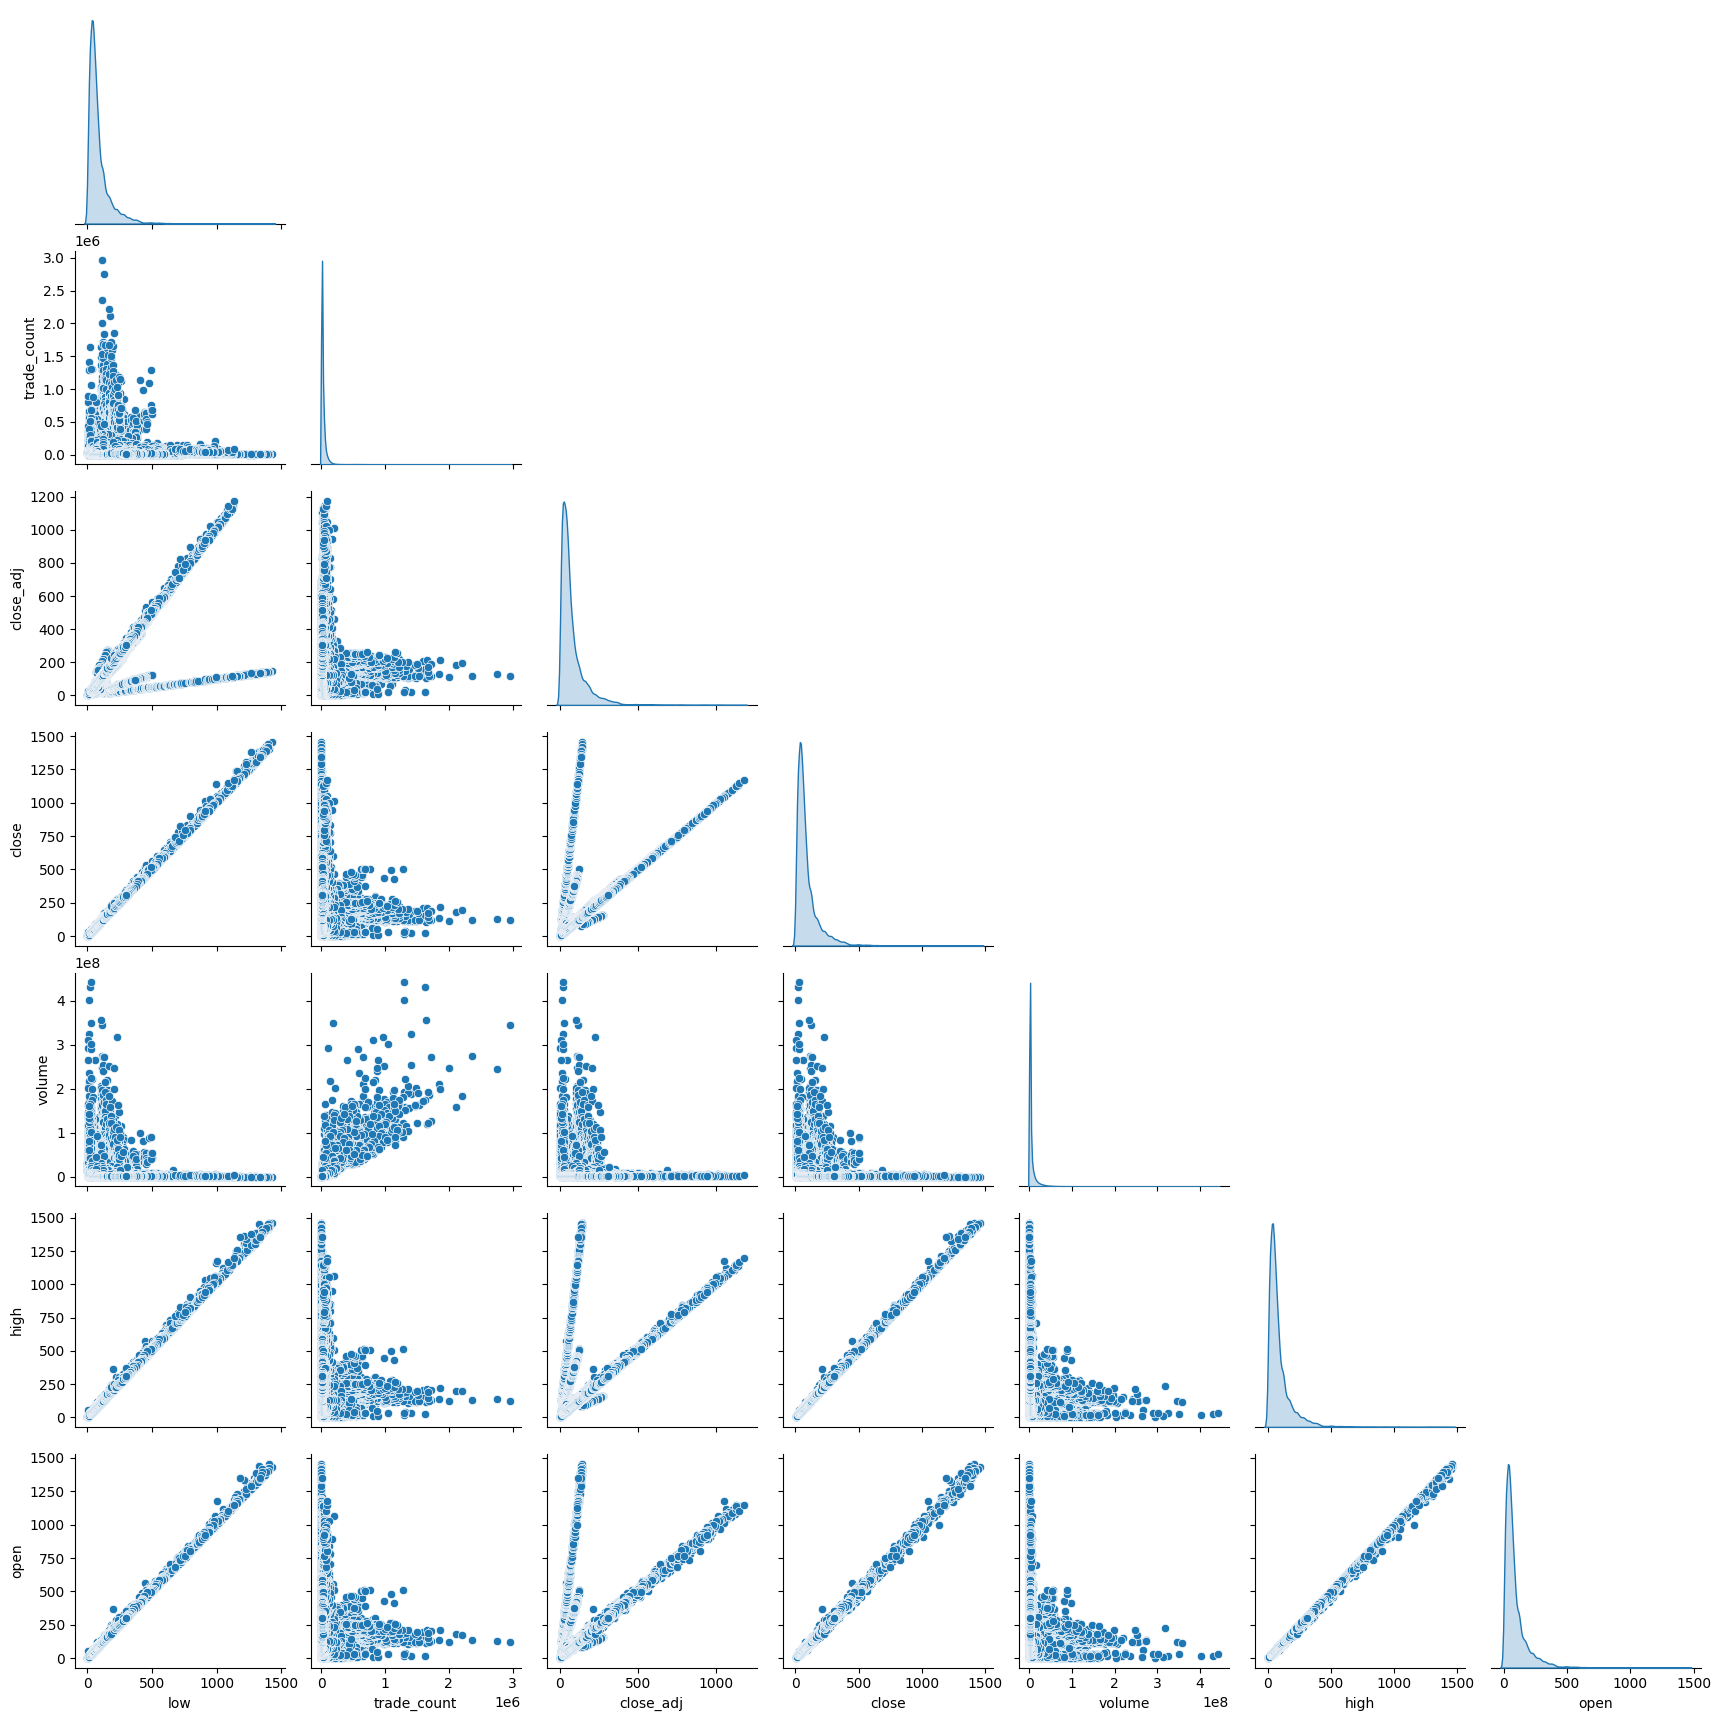

In [13]:
pares = corr_final.index.tolist()
variables = set([col for par in pares for col in par])
variables_corr = data[list(variables)]
sns.pairplot(variables_corr, diag_kind = 'kde', corner = True)

### Fechas con mayor y menor perdida

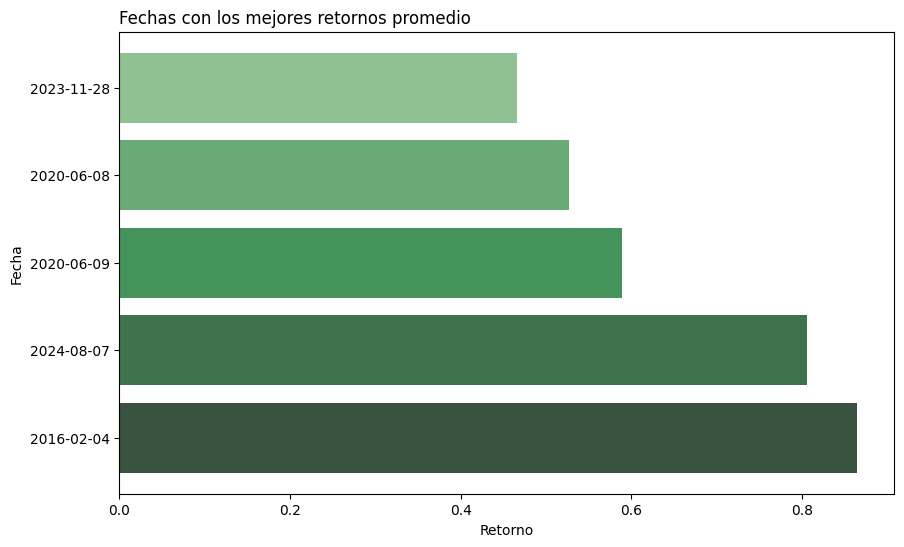

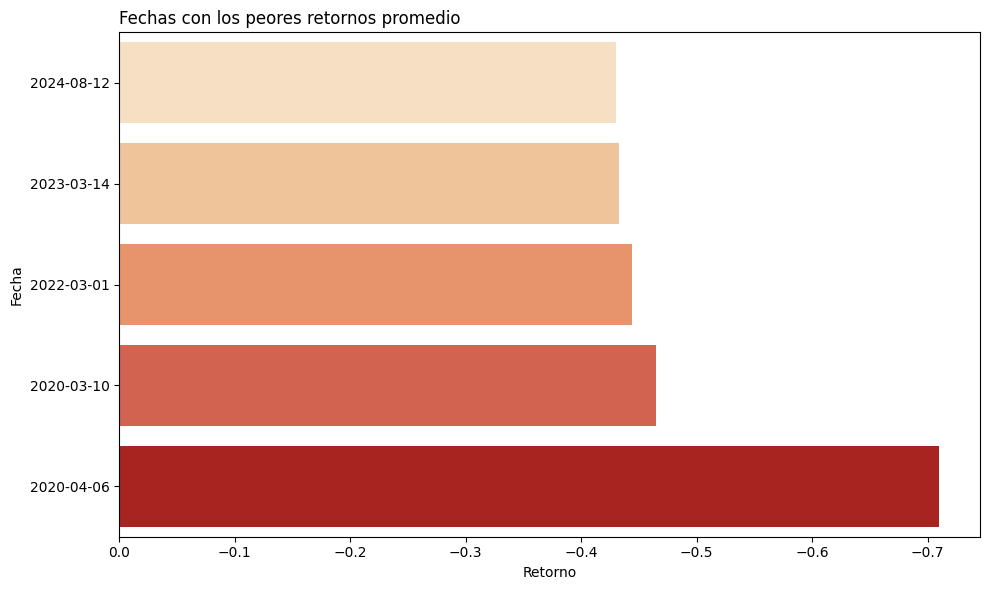

In [263]:
idx_max = data.dropna(subset = 'prev_day_return').groupby('timestamp')['prev_day_return'].idxmax()
max_return = data.loc[idx_max].nlargest(5, 'prev_day_return')
max_return = max_return.sort_values(by = 'prev_day_return', ascending = True)

idx_min = data.dropna(subset = 'prev_day_return').groupby('timestamp')['prev_day_return'].idxmin()
min_return = data.loc[idx_min].nsmallest(5, 'prev_day_return')
min_return = min_return.sort_values(by = 'prev_day_return', ascending = False)


plt.figure(figsize=(10, 6))
sns.barplot(data = max_return, x = 'prev_day_return', y = 'timestamp', orient = 'h',
            hue = 'timestamp', palette = 'Greens_d', legend = False)
plt.title('Fechas con los mejores retornos promedio', loc = 'left')
plt.xlabel('Retorno')
plt.ylabel('Fecha')
plt.plot()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data = min_return, x ='prev_day_return', y ='timestamp', orient = 'h',
                 hue ='timestamp', palette = 'OrRd', legend = False)
ax.invert_xaxis() 
plt.xlabel('Retorno')
plt.ylabel('Fecha')
plt.title('Fechas con los peores retornos promedio',  loc = 'left')
plt.tight_layout()
plt.show()


### Fechas con mayor numero de transacciones realizadas

In [25]:
mapeo_sectores = {
    'SPSITN.INDX': 'Transporte',
    'SPSICH.INDX': 'Hardware Tecnológico',
    'SPSISS.INDX': 'Software y Servicios',
    'SPSISC.INDX': 'Semiconductores',
    'SPSIBI.INDX': 'Biotecnología',
    'SPSIIN.INDX': 'Industriales',
    'SPSIPH.INDX': 'Productos Farmacéuticos',
    'SPSIOP.INDX': 'Exploración y Producción de Petróleo y Gas',
    'SPSIHE.INDX': 'Equipos de Salud',
    'SPSIRE.INDX': 'Minorista (Retail)',
    'SPSIFB.INDX': 'Alimentos y Bebidas',
    'SPSIHP.INDX': 'Servicios de Salud',
    'SPSIAD.INDX': 'Aeroespacial y Defensa',
    'SPSIMM.INDX': 'Metales y Minería',
    'SPSITE.INDX': 'Telecomunicaciones',
    'SPSIOS.INDX': 'Equipos y Servicios de Petróleo y Gas',
    'SPSIBK.INDX': 'Bancos',
    'SPSICM.INDX': 'Mercados de Capitales',
    'SPSIHO.INDX': 'Constructores de Viviendas'
}

data['sector_index'] = data['sector_index'].map(mapeo_sectores)

In [26]:
sector_trade = data.groupby('sector_index')['trade_count'].mean().reset_index()
sector_trade.loc['average'] = ['Average'] + [sector_trade['trade_count'].mean()]
sector_trade = sector_trade.sort_values(by = 'trade_count', ascending = False)
sector_trade

,sector_index,trade_count
8,Hardware Tecnológico,116960.622556
17,Telecomunicaciones,67850.380203
13,Productos Farmacéuticos,52658.938649
6,Equipos y Servicios de Petróleo y Gas,44355.964298
7,Exploración y Producción de Petróleo y Gas,34184.853955
14,Semiconductores,32778.388398
18,Transporte,30771.461386
average,Average,29871.363728
12,Minorista (Retail),28893.778227
4,Constructores de Viviendas,23666.306856


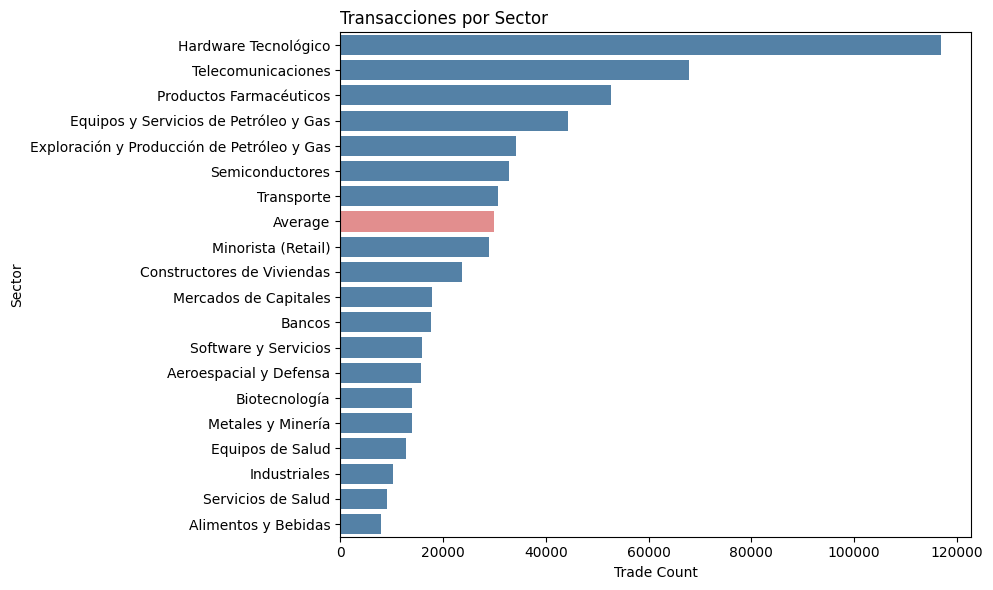

In [27]:
# plt.figure(figsize=(10, 6))
palette = {sector: 'lightcoral' if sector == 'Average' else 'steelblue' 
           for sector in sector_trade['sector_index']}

plt.figure(figsize=(10, 6))
sns.barplot(data = sector_trade, x = 'trade_count', y = 'sector_index', 
            hue = 'sector_index', palette = palette, legend = False)
plt.xlabel('Trade Count')
plt.ylabel('Sector')
plt.title('Transacciones por Sector', loc = 'left')
plt.tight_layout()
plt.show()

In [28]:
corte = pd.Timestamp('2025-01-01').date()
data_filter = data[data['timestamp'] > corte]

# Concentración del volumne del premarket por sector
sector_return = data.groupby('sector_index')['hhi_premarket_volume'].mean().reset_index()
sector_return.loc['average'] = ['Average'] + [sector_return['hhi_premarket_volume'].mean()]
sector_return = sector_return.sort_values(by = 'hhi_premarket_volume', ascending = False)
sector_return

,sector_index,hhi_premarket_volume
7,Exploración y Producción de Petróleo y Gas,0.489861
17,Telecomunicaciones,0.478725
12,Minorista (Retail),0.466345
14,Semiconductores,0.425550
3,Biotecnología,0.405900
8,Hardware Tecnológico,0.397686
13,Productos Farmacéuticos,0.391426
6,Equipos y Servicios de Petróleo y Gas,0.391370
2,Bancos,0.390604
10,Mercados de Capitales,0.384006


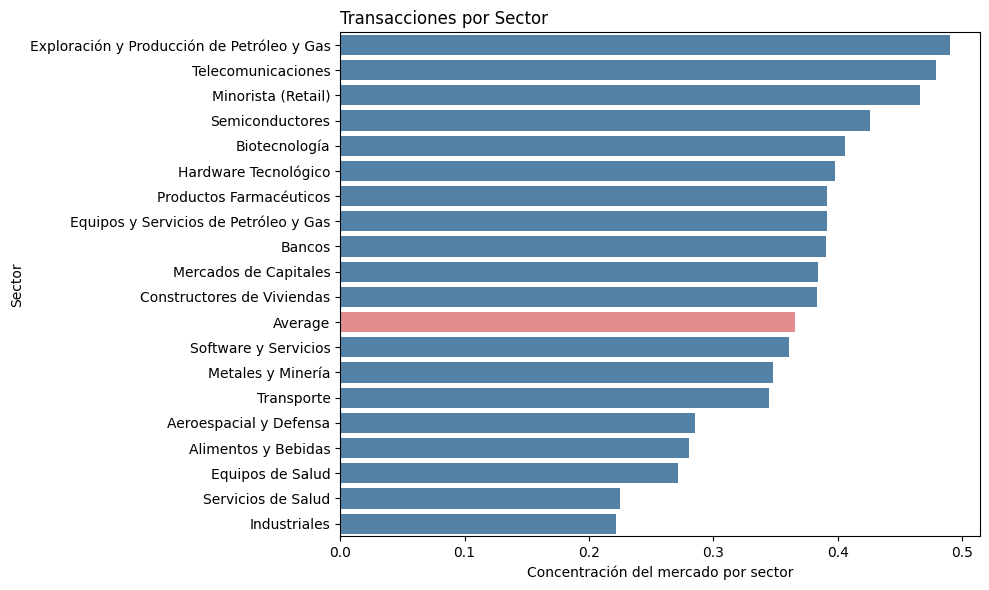

In [29]:
palette = {sector: 'lightcoral' if sector == 'Average' else 'steelblue' 
           for sector in sector_trade['sector_index']}

plt.figure(figsize=(10, 6))
sns.barplot(data = sector_return, x = 'hhi_premarket_volume', y = 'sector_index', 
            hue = 'sector_index', palette = palette, legend = False)
plt.xlabel('Concentración del mercado por sector')
plt.ylabel('Sector')
plt.title('Transacciones por Sector', loc = 'left')
plt.tight_layout()
plt.show()

# No necesariamente los sectores que menos transacciones realizan son los más concentrados

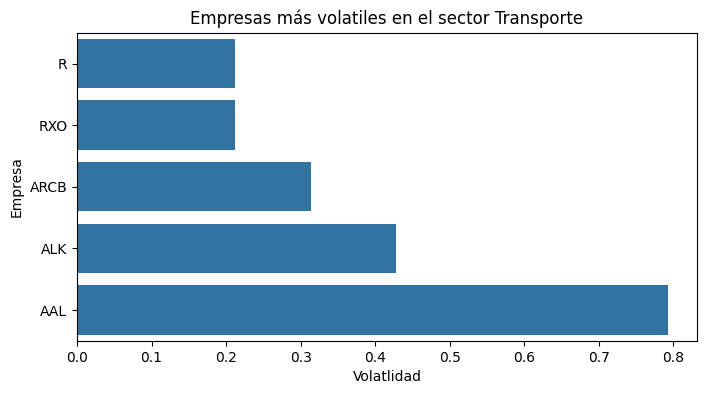

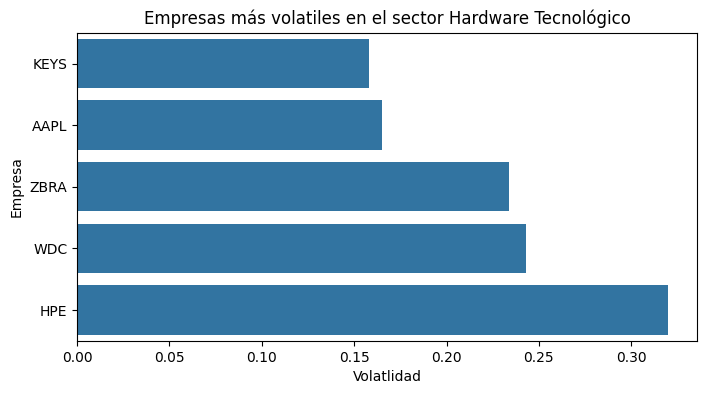

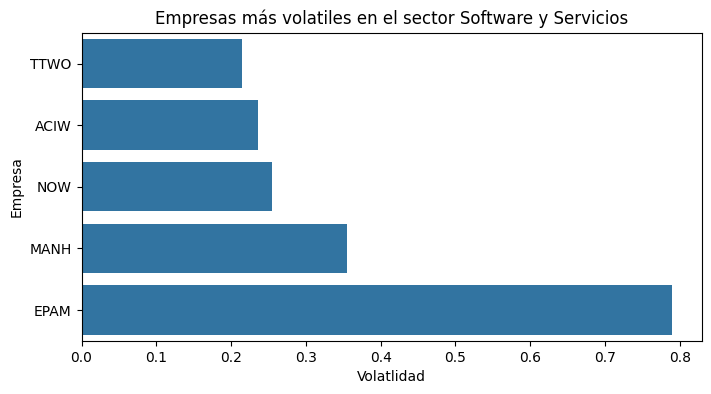

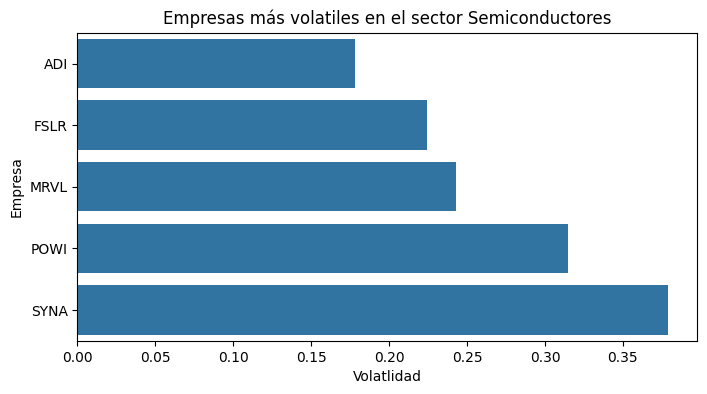

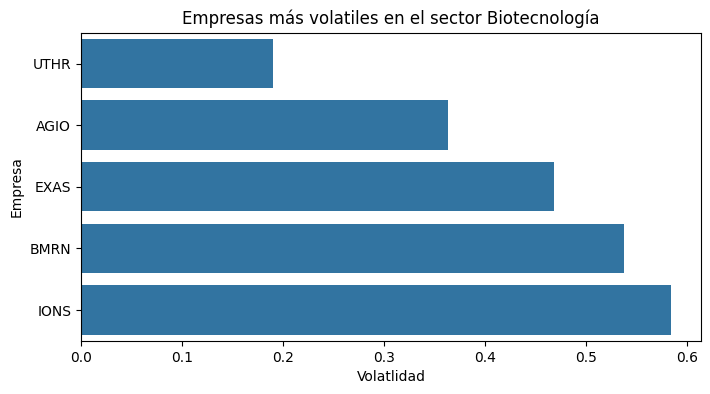

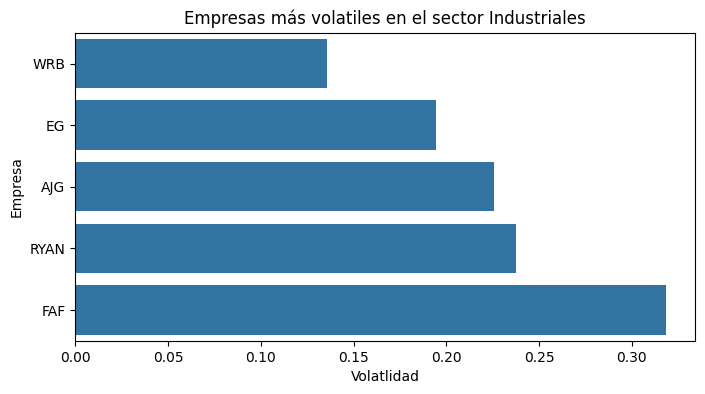

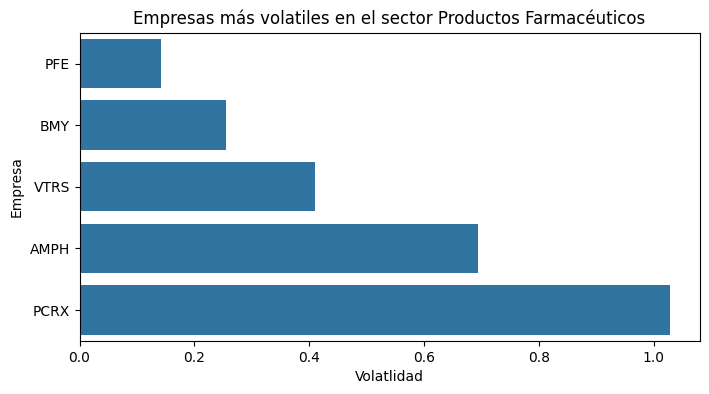

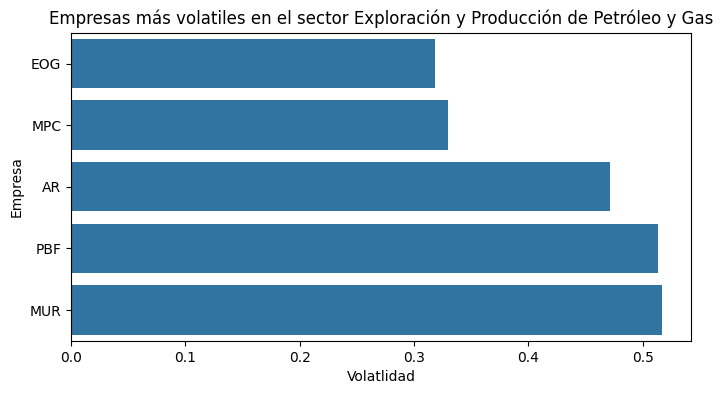

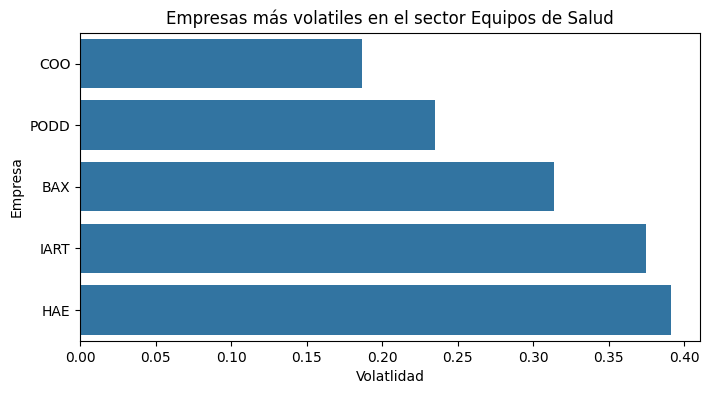

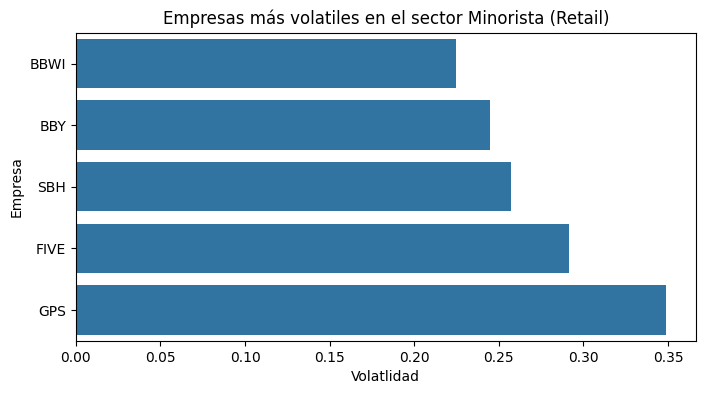

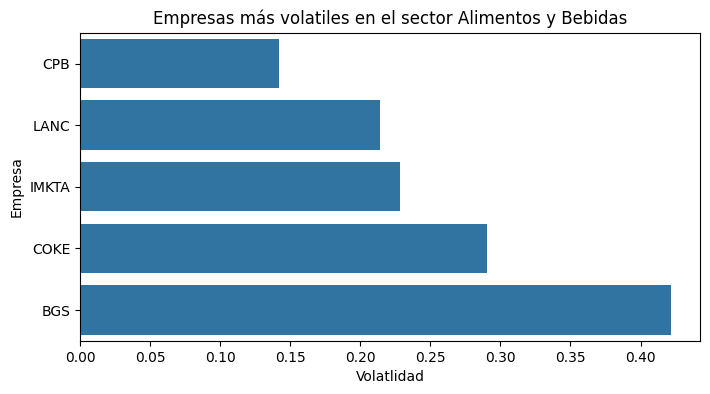

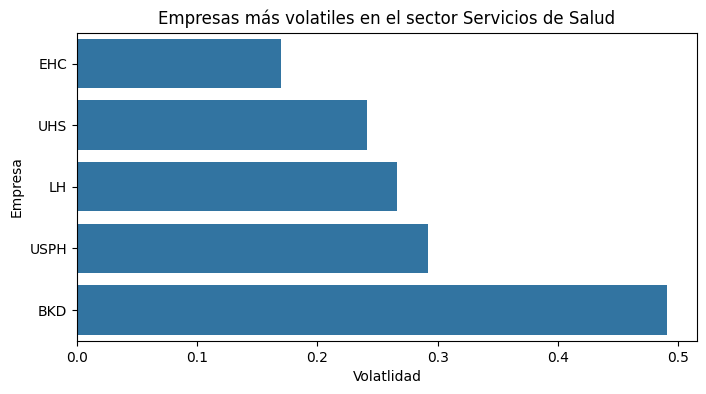

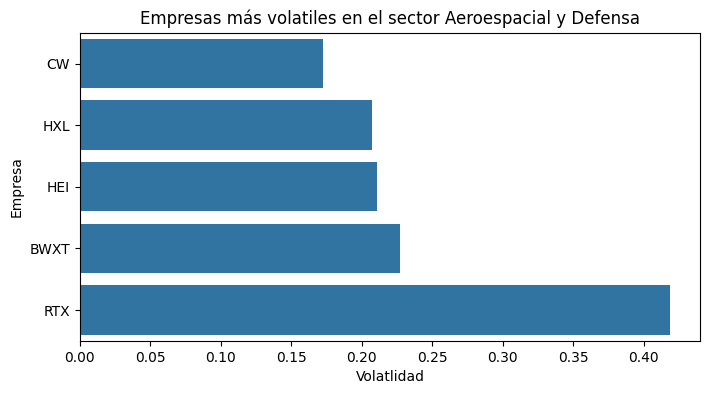

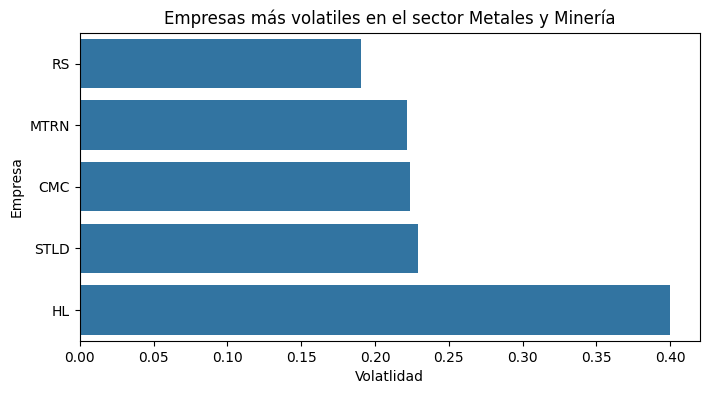

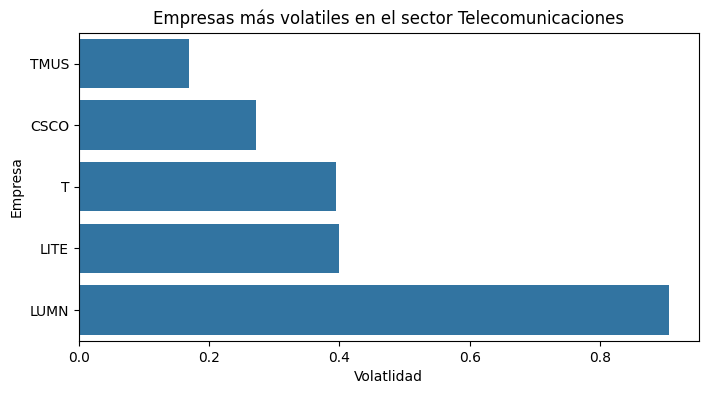

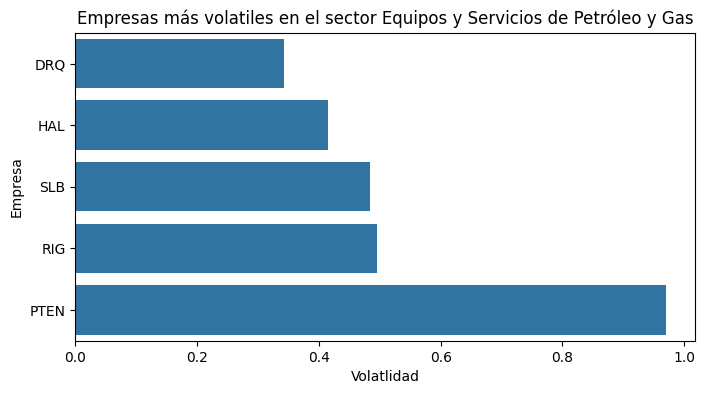

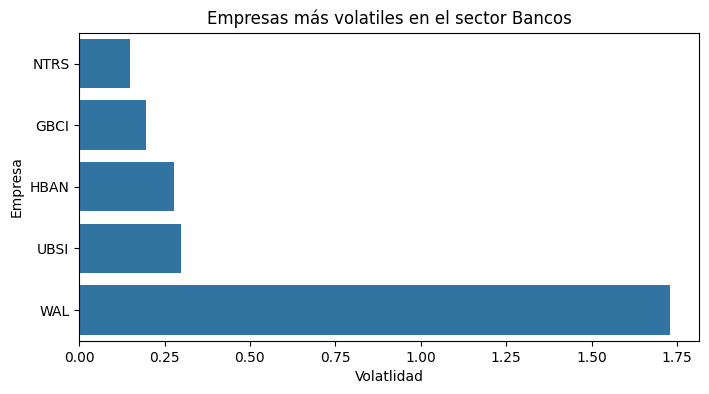

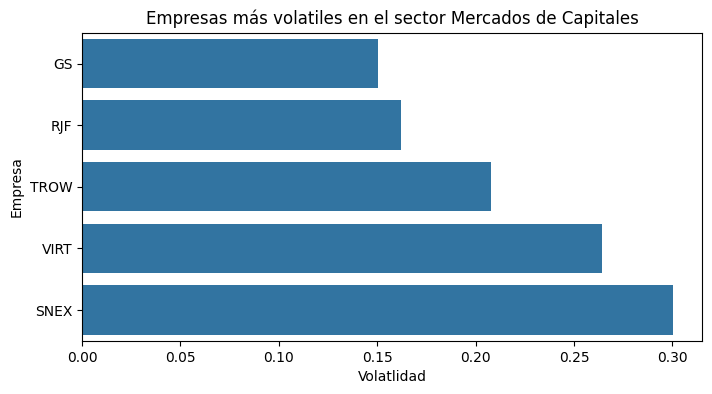

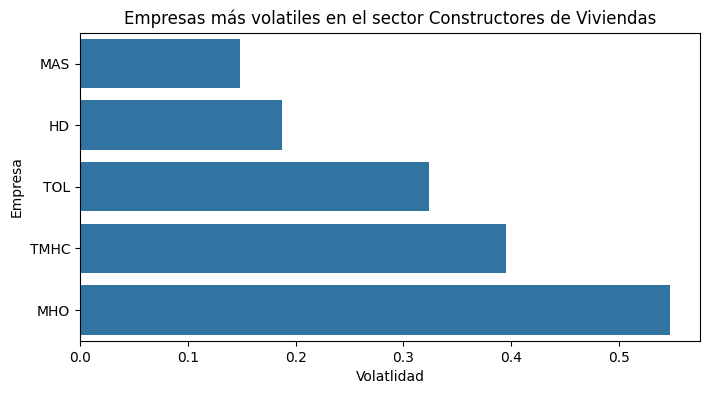

In [30]:
# Empresas más volatiles por sector
sectores = data['sector_index'].unique()
for sector in sectores:
    data_agrup = data[data['sector_index'] == sector]

    indices = data_agrup.groupby('symbol')['range_rel_last1d'].idxmax()
    data_agrup = data_agrup.loc[indices].nlargest(5, 'range_rel_last1d')
    data_agrup = data_agrup.sort_values(by = 'range_rel_last1d')
    
    plt.figure(figsize=(8, 4))
    sns.barplot(data = data_agrup, x = 'range_rel_last1d', y = 'symbol', orient = 'h') 
    plt.title(f'Empresas más volatiles en el sector {sector}')
    plt.ylabel('Empresa')
    plt.xlabel('Volatlidad')

In [24]:
pd.DataFrame(data['sector_index'].unique()).to_clipboard(index = False)